In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from time import time

In [29]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [264]:
import multiprocessing
import numpy as np

In [168]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel

In [4]:
from save_load import save_obj,load_obj

In [256]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [257]:
def generate_labels(title,xlabel,ylabel):    
    layout = go.Layout(title= title,
                       xaxis=dict(title=xlabel, automargin=True),
                       yaxis=dict(title=ylabel))
    return {'layout':layout}

In [5]:
doc = load_obj('mod_doc')

In [212]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=10, 
                                strip_accents = 'unicode',
                                max_features=5000,
                                stop_words='english', lowercase=True,
                                token_pattern=r'\b[a-zA-Z]{3,}\b')

In [213]:
t0 = time()
# tf = tf_vectorizer.fit_transform(mod_doc)
tf = tf_vectorizer.fit_transform(doc)
print("done in %0.3fs." % (time() - t0))
print()

done in 6.297s.



In [214]:
# transform sparse matrix into gensim corpus
corpus_vect_gensim = gensim.matutils.Sparse2Corpus(tf, documents_columns=False)

In [215]:
id2word = dict((ids, word) for word, ids in tf_vectorizer.vocabulary_.items())
dictionary = Dictionary.from_corpus(corpus_vect_gensim, id2word=id2word)

In [15]:
lda = LdaModel(corpus=corpus_vect_gensim, id2word=id2word, 
               alpha='auto', eta='auto', 
               iterations=400, num_topics=20,
               random_state=42, passes=10, chunksize=2000)

In [17]:
# save model
# save_obj(lda,'lda_gensim')

In [191]:
pprint(lda.top_topics(corpus_vect_gensim, topn=20))

[([(0.004996376, 'use'),
   (0.0043812077, 'know'),
   (0.0039463267, 'like'),
   (0.0038207273, 'good'),
   (0.0037684226, 'think'),
   (0.003239962, 'people'),
   (0.0030044587, 'time'),
   (0.002830531, 'work'),
   (0.0028015692, 'look'),
   (0.00264449, 'problem'),
   (0.0026069072, 'year'),
   (0.0025864595, 'need'),
   (0.002534153, 'new'),
   (0.0025273554, 'thank'),
   (0.0024898837, 'want'),
   (0.0023481, 'try'),
   (0.0023364709, 'drive'),
   (0.0022798863, 'thing'),
   (0.002243588, 'post'),
   (0.0022167976, 'file')],
  -1.6638698698373195),
 ([(0.022306636, 'team'),
   (0.019233752, 'game'),
   (0.0154621545, 'player'),
   (0.011192416, 'hockey'),
   (0.010962301, 'baseball'),
   (0.010815478, 'season'),
   (0.010026043, 'play'),
   (0.008797609, 'league'),
   (0.008259643, 'score'),
   (0.007740173, 'win'),
   (0.0073887277, 'nhl'),
   (0.0073702615, 'playoff'),
   (0.005818479, 'detroit'),
   (0.005800758, 'espn'),
   (0.005211515, 'pitcher'),
   (0.0050602313, 'braves'

In [27]:
pprint(lda.print_topics())

[(0,
  '0.021*"gun" + 0.019*"government" + 0.013*"law" + 0.010*"state" + '
  '0.008*"right" + 0.008*"crime" + 0.008*"weapon" + 0.008*"control" + '
  '0.008*"public" + 0.007*"people"'),
 (1,
  '0.047*"edu" + 0.036*"com" + 0.020*"mail" + 0.020*"post" + 0.017*"send" + '
  '0.017*"information" + 0.015*"list" + 0.014*"address" + 0.013*"email" + '
  '0.011*"request"'),
 (2,
  '0.011*"question" + 0.010*"use" + 0.009*"people" + 0.009*"mean" + '
  '0.008*"claim" + 0.008*"exist" + 0.008*"think" + 0.007*"example" + '
  '0.007*"argument" + 0.007*"law"'),
 (3,
  '0.016*"bike" + 0.014*"new" + 0.012*"nhl" + 0.012*"king" + 0.011*"chicago" + '
  '0.010*"dod" + 0.010*"detroit" + 0.010*"mike" + 0.009*"boston" + '
  '0.009*"good"'),
 (4,
  '0.024*"space" + 0.016*"image" + 0.011*"available" + 0.011*"program" + '
  '0.009*"nasa" + 0.009*"software" + 0.008*"include" + 0.008*"launch" + '
  '0.008*"datum" + 0.007*"ftp"'),
 (5,
  '0.015*"armenian" + 0.011*"president" + 0.010*"year" + 0.010*"april" + '
  '0.010*

## Note gensim starts indexing at 0 and pyLDAvis starts at 1

In [33]:
# Visualize the topics
visualize = pyLDAvis.gensim.prepare(lda, corpus_vect_gensim, dictionary,sort_topics=False)
visualize

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.066729 -0.180583       1        1   6.441814
1     -0.055353  0.033443       2        1   4.968007
2     -0.040527 -0.182390       3        1   9.530899
3      0.182941  0.171828       4        1   2.256670
4     -0.102565  0.028344       5        1   6.560561
5      0.162038 -0.087677       6        1   5.943226
6      0.106213  0.023929       7        1   3.904155
7      0.019574 -0.116546       8        1  18.067123
8      0.161298 -0.208789       9        1   2.979526
9      0.136141  0.160924      10        1   2.135787
10    -0.095815  0.034701      11        1   3.568173
11    -0.158805  0.088424      12        1   5.542151
12    -0.174870  0.108043      13        1   3.633693
13     0.278546  0.244603      14        1   1.132503
14    -0.126470 -0.017919      15        1   2.944277
15     0.077557 -0.196471      16        1   5.057064
16    -0.190088  0.049773      17        1   7.233135
17    -0.119633  0.051660      18        1   3.703020
18    -0.064279 -0.064369      19        1   2.721819
19    -0.062631  0.059073      20        1   1.676400, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
3791  Default  5847.000000          max  5847.000000  30.0000  30.0000
130   Default  6873.000000          use  6873.000000  29.0000  29.0000
116   Default  1670.000000          key  1670.000000  28.0000  28.0000
1198  Default  1871.000000          god  1871.000000  27.0000  27.0000
222   Default  2455.000000         file  2455.000000  26.0000  26.0000
175   Default  2465.000000          edu  2465.000000  25.0000  25.0000
1454  Default  1351.000000         game  1351.000000  24.0000  24.0000
280   Default  1069.000000          car  1069.000000  23.0000  23.0000
432   Default  1508.000000          com  1508.000000  22.0000  22.0000
126   Default  1657.000000        drive  1657.000000  21.0000  21.0000
168   Default  4184.000000         good  4184.000000  20.0000  20.0000
143   Default  2862.000000         year  2862.000000  19.0000  19.0000
46    Default  4194.000000       people  4194.000000  18.0000  18.0000
1348  Default  1007.000000         team  1007.000000  17.0000  17.0000
204   Default  1047.000000         card  1047.000000  16.0000  16.0000
412   Default  1307.000000        space  1307.000000  15.0000  15.0000
79    Default  4589.000000         know  4589.000000  14.0000  14.0000
1528  Default  1026.000000          gun  1026.000000  13.0000  13.0000
22    Default  3909.000000        think  3909.000000  12.0000  12.0000
34    Default  1300.000000   government  1300.000000  11.0000  11.0000
179   Default   907.000000        jesus   907.000000  10.0000  10.0000
653   Default  1489.000000          bit  1489.000000   9.0000   9.0000
1212  Default   918.000000         chip   918.000000   8.0000   8.0000
194   Default  2020.000000      program  2020.000000   7.0000   7.0000
172   Default  1211.000000         mail  1211.000000   6.0000   6.0000
163   Default  1668.000000         post  1668.000000   5.0000   5.0000
655   Default   978.000000         play   978.000000   4.0000   4.0000
68    Default  2657.000000          new  2657.000000   3.0000   3.0000
1525  Default  1272.000000          law  1272.000000   2.0000   2.0000
1894  Default   799.000000          win   799.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
1232  Topic20   252.346649      quality   320.518036   3.8494  -3.9151
1816  Topic20    84.176888        laser    97.488937   3.9417  -5.0130
3337  Topic20    43.726398          rpm    47.957676   3.9962  -5.6680
2665  Topic20    90.561501        plant   118.879509   3.8164  -4.9399
2872  Topic20    69.120316          sec    92.120285   3.8013  -5.2101
2461  Topic20    53.602768        thumb    67.666458   3.8555  -5.4643


In [42]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=10, 
                                strip_accents = 'unicode',
                                max_features=5000,
                                stop_words='english', lowercase=True,
                                token_pattern=r'\b[a-zA-Z]{3,}\b')

In [43]:
t0 = time()
# tf = tf_vectorizer.fit_transform(mod_doc)
tfidf = tfidf_vectorizer.fit_transform(doc)
print("done in %0.3fs." % (time() - t0))
print()

done in 2.368s.



In [44]:
corpus_vect_gensim_tfidf = gensim.matutils.Sparse2Corpus(tfidf, documents_columns=False)

In [45]:
id2word_tfidf = dict((ids, word) for word, ids in tfidf_vectorizer.vocabulary_.items())
dictionary_tfidf = Dictionary.from_corpus(corpus_vect_gensim_tfidf, id2word=id2word_tfidf)

In [300]:
lda_tfidf = LdaModel(corpus=corpus_vect_gensim_tfidf, id2word=id2word_tfidf, 
               alpha='auto', eta='auto', 
               iterations=400, num_topics=18,
               random_state=42, passes=10, chunksize=2000)

In [301]:
pprint(lda_tfidf.top_topics(corpus_vect_gensim_tfidf, topn=20))

[([(0.007909186, 'use'),
   (0.0071694516, 'know'),
   (0.0064596306, 'like'),
   (0.0062545952, 'good'),
   (0.006168515, 'think'),
   (0.0053032534, 'people'),
   (0.004917028, 'time'),
   (0.0045819595, 'look'),
   (0.004580313, 'work'),
   (0.0043169414, 'year'),
   (0.0042424477, 'problem'),
   (0.004180046, 'need'),
   (0.0041454756, 'new'),
   (0.0040740194, 'want'),
   (0.0039040407, 'thank'),
   (0.0038381245, 'try'),
   (0.0037300487, 'thing'),
   (0.003670621, 'post'),
   (0.0035745597, 'right'),
   (0.003568553, 'edu')],
  -1.5883504856417612),
 ([(0.026546646, 'file'),
   (0.022727838, 'card'),
   (0.021226121, 'window'),
   (0.018371144, 'program'),
   (0.017773785, 'windows'),
   (0.01600603, 'disk'),
   (0.0147050135, 'software'),
   (0.014137624, 'driver'),
   (0.013187736, 'monitor'),
   (0.012476134, 'dos'),
   (0.012303954, 'mac'),
   (0.012261281, 'info'),
   (0.011828325, 'video'),
   (0.011490467, 'thanks'),
   (0.010778815, 'color'),
   (0.010062647, 'ftp'),
   

In [303]:
## Visualize the topics
visualize_tfidf = pyLDAvis.gensim.prepare(lda_tfidf, corpus_vect_gensim_tfidf, dictionary_tfidf,sort_topics=False)
visualize_tfidf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.059443 -0.001874       1        1   0.220451
1      0.099516 -0.171238       2        1   6.304578
2      0.263712  0.285867       3        1   6.606356
3     -0.061377 -0.003887       4        1   0.295682
4     -0.055348 -0.014278       5        1   1.394508
5      0.089255 -0.150345       6        1   5.350378
6      0.114803 -0.031891       7        1   5.282082
7      0.065172 -0.106829       8        1   4.446473
8     -0.064399 -0.004173       9        1   0.317895
9     -0.066476 -0.004115      10        1   0.367388
10     0.244067  0.018888      11        1   7.217041
11    -0.062711 -0.016322      12        1   0.969460
12    -0.179929  0.249116      13        1  58.168747
13    -0.065160 -0.014878      14        1   0.815490
14    -0.065194 -0.006039      15        1   0.456626
15    -0.066903 -0.013621      16        1   0.741316
16    -0.065429 -0.005498      17        1   0.439662
17    -0.064157 -0.008882      18        1   0.605871, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
1198  Default   96.000000          god   96.000000  30.0000  30.0000
222   Default   99.000000         file   99.000000  29.0000  29.0000
116   Default   75.000000          key   75.000000  28.0000  28.0000
204   Default   79.000000         card   79.000000  27.0000  27.0000
651   Default   76.000000       window   76.000000  26.0000  26.0000
126   Default  114.000000        drive  114.000000  25.0000  25.0000
194   Default   80.000000      program   80.000000  24.0000  24.0000
1038  Default   62.000000      windows   62.000000  23.0000  23.0000
1538  Default   61.000000       driver   61.000000  22.0000  22.0000
1012  Default   56.000000         disk   56.000000  21.0000  21.0000
179   Default   46.000000        jesus   46.000000  20.0000  20.0000
1305  Default   53.000000       player   53.000000  19.0000  19.0000
368   Default   54.000000     software   54.000000  18.0000  18.0000
333   Default   29.000000         soon   29.000000  17.0000  17.0000
1454  Default  101.000000         game  101.000000  16.0000  16.0000
175   Default  110.000000          edu  110.000000  15.0000  15.0000
430   Default   46.000000      monitor   46.000000  14.0000  14.0000
34    Default   63.000000   government   63.000000  13.0000  13.0000
2120  Default   38.000000    christian   38.000000  12.0000  12.0000
88    Default   40.000000       israel   40.000000  11.0000  11.0000
506   Default   44.000000          dos   44.000000  10.0000  10.0000
494   Default   43.000000          mac   43.000000   9.0000   9.0000
418   Default   47.000000         info   47.000000   8.0000   8.0000
660   Default   44.000000        color   44.000000   7.0000   7.0000
778   Default   42.000000        video   42.000000   6.0000   6.0000
852   Default   34.000000        modem   34.000000   5.0000   5.0000
1345  Default   35.000000     religion   35.000000   4.0000   4.0000
1348  Default   68.000000         team   68.000000   3.0000   3.0000
2449  Default   43.000000       thanks   43.000000   2.0000   2.0000
1261  Default   33.000000        bible   33.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
1175  Topic18    8.330256       gordon    8.994401   5.0296  -3.6483
1176  Topic18    7.202119        banks    7.866263   5.0181  -3.7939
1179  Topic18    6.983931    intellect    7.648075   5.0154  -3.8246
1177  Topic18    6.964982   skepticism    7.629127   5.0152  -3.8273
1180  Topic18    6.912664          geb    7.576808   5.0145  -3.8349
1183  Topic18    6.849247     shameful    7.513391   5.0137  -3.8441
1181  Topic18    6.828232        cadre    7.492376   5.0134  -3.8472
1178  Topic18    6.788103     chastity    7.452247   5.0129  -3.8531
1182  Topic18    6.774295          dsl    7.4384

## Word2Vec Model

In [63]:
# Get number of CPU core
cores = multiprocessing.cpu_count() 
cores

8

In [240]:
doc_list = load_obj('doc_list')

In [153]:
t = time()
word2vec = gensim.models.Word2Vec(doc_list,min_count=10, window=5,
                                  size=5000, workers=cores-1)

print('Building Time : {:.2f} mins'.format((time() - t) / 60))

Building Time : 0.87 mins


In [154]:
# save_obj(word2vec,'word2vec_5000')

In [148]:
w2v = load_obj('word2vec_5000')

In [144]:
w2v.wv.most_similar(positive=["god"])

[('jesus', 0.9357113838195801),
 ('word', 0.912039577960968),
 ('christ', 0.892924964427948),
 ('sin', 0.8912561535835266),
 ('spirit', 0.8883153200149536),
 ('heaven', 0.8818057775497437),
 ('faith', 0.878771960735321),
 ('grace', 0.8769556879997253),
 ('gospel', 0.8766798973083496),
 ('bless', 0.8746601939201355)]

In [149]:
w2v.wv.most_similar(positive=["god"])

[('jesus', 0.9316027760505676),
 ('word', 0.9078030586242676),
 ('christ', 0.8902674913406372),
 ('spirit', 0.8879156112670898),
 ('heaven', 0.8865305185317993),
 ('salvation', 0.8860034346580505),
 ('bless', 0.8842337131500244),
 ('sin', 0.8808265924453735),
 ('scripture', 0.8805694580078125),
 ('eternal', 0.879788875579834)]

In [150]:
w2v.wv.most_similar(positive=["jesus"])

[('christ', 0.9759734272956848),
 ('matthew', 0.9703889489173889),
 ('heaven', 0.9621171951293945),
 ('bless', 0.9572410583496094),
 ('spirit', 0.9562658071517944),
 ('lord', 0.9528225660324097),
 ('gospel', 0.951744556427002),
 ('father', 0.9466325044631958),
 ('passage', 0.9453181624412537),
 ('eternal', 0.9439318180084229)]

In [136]:
w2v.wv.similarity('god','jesus')

0.93900305

## Optimize topic numbers by caculating coherence

In [282]:
ls data/

a.pkl               lda_gensim.pkl      obj.pkl             word2vec_2000.pkl
coherence_vals.pkl  mod_doc.pkl         word2vec.pkl        word2vec_5000.pkl
doc_list.pkl        models.pkl          word2vec_1000.pkl


In [324]:
doc_list = load_obj('doc_list')

In [326]:
print(doc_list[0],end= " ")

['sure', 'story', 'nad', 'biased', 'disagree', 'statement', 'media', 'ruin', 'israels', 'reputation', 'rediculous', 'media', 'proisraeli', 'medium', 'world', 'live', 'europe', 'realize', 'incidence', 'describe', 'letter', 'occur', 'medium', 'try', 'ignore', 'subsidize', 'israels', 'existance', 'europeans', 'degree', 'think', 'reason', 'report', 'clearly', 'atrocity', 'shame', 'austria', 'daily', 'report', 'inhuman', 'act', 'commit', 'israeli', 'soldier', 'blessing', 'receive', 'government', 'holocaust', 'guilt', 'away', 'look', 'jews', 'treat', 'race', 'power', 'unfortunate'] 

In [327]:
id2word = Dictionary(doc_list)

In [328]:
len(id2word)

92353

In [329]:
id2word.filter_extremes(no_below=10, no_above=0.95)

In [330]:
len(id2word)

7178

In [331]:
t = time()
corpus = [id2word.doc2bow(text) for text in doc_list]
print('Building Time : {:.2f} mins'.format((time() - t) / 60))

Building Time : 0.02 mins


In [332]:
pprint(id2word[2])

'austria'


In [333]:
print(corpus[:1],end=" ")

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)]] 

In [427]:
t=time()
lda = LdaModel(corpus=corpus, id2word=id2word, 
                       alpha='auto', eta='auto',
                       iterations=100, num_topics=25, per_word_topics=True,
                       random_state=42, passes=6, chunksize=2000)
print('Building Time : {:.2f} mins'.format((time() - t) / 60))

Building Time : 0.79 mins


In [428]:
## Visualize the topics
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word,sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.158655 -0.133167       1        1  3.560488
1     -0.089025 -0.070287       2        1  4.819043
2     -0.092544 -0.002425       3        1  3.640604
3     -0.260476 -0.007061       4        1  5.044539
4      0.009476  0.082505       5        1  1.997775
5     -0.174110 -0.060872       6        1  2.425325
6     -0.162557 -0.046498       7        1  3.945592
7      0.171045  0.026566       8        1  6.626634
8      0.123394 -0.060978       9        1  5.738397
9      0.158119 -0.121898      10        1  6.446327
10     0.102816  0.212769      11        1  3.971160
11     0.108713  0.345305      12        1  2.220659
12     0.044010 -0.014265      13        1  3.594704
13     0.157844  0.032932      14        1  2.253307
14     0.074170 -0.025764      15        1  5.396524
15     0.154351 -0.013179      16        1  1.505336
16     0.000781  0.086086      17        1  6.429157
17     0.158374 -0.130490      18        1  8.027208
18    -0.110893  0.114949      19        1  1.819636
19    -0.091092 -0.084611      20        1  3.023734
20     0.056331 -0.167922      21        1  4.402649
21    -0.244138  0.065157      22        1  2.931855
22    -0.144609 -0.056881      23        1  2.436788
23    -0.051293  0.096427      24        1  4.487496
24    -0.057343 -0.066398      25        1  3.255059, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
208   Default  2669.000000           file  2669.000000  30.0000  30.0000
126   Default  1683.000000          drive  1683.000000  29.0000  29.0000
1223  Default  1862.000000            god  1862.000000  28.0000  28.0000
133   Default  1474.000000            key  1474.000000  27.0000  27.0000
2073  Default  1354.000000           game  1354.000000  26.0000  26.0000
158   Default  6984.000000            use  6984.000000  25.0000  25.0000
1173  Default  1157.000000         window  1157.000000  24.0000  24.0000
175   Default  1731.000000           post  1731.000000  23.0000  23.0000
278   Default  1052.000000            car  1052.000000  22.0000  22.0000
221   Default  2075.000000        program  2075.000000  21.0000  21.0000
1025  Default  1187.000000          space  1187.000000  20.0000  20.0000
166   Default  4210.000000           good  4210.000000  19.0000  19.0000
543   Default  1239.000000          email  1239.000000  18.0000  18.0000
1437  Default  1024.000000           team  1024.000000  17.0000  17.0000
550   Default   788.000000          entry   788.000000  16.0000  16.0000
188   Default   897.000000          jesus   897.000000  15.0000  15.0000
1567  Default   909.000000            gun   909.000000  14.0000  14.0000
142   Default   749.000000          price   749.000000  13.0000  13.0000
300   Default  1365.000000          thank  1365.000000  12.0000  12.0000
200   Default   960.000000           card   960.000000  11.0000  11.0000
70    Default  2615.000000            new  2615.000000  10.0000  10.0000
653   Default   914.000000          image   914.000000   9.0000   9.0000
984   Default  1374.000000           send  1374.000000   8.0000   8.0000
1808  Default   619.000000           scsi   619.000000   7.0000   7.0000
869   Default   978.000000           play   978.000000   6.0000   6.0000
1243  Default   876.000000           chip   876.000000   5.0000   5.0000
72    Default  4128.000000         people  4128.000000   4.0000   4.0000
161   Default  2793.000000           year  2793.000000   3.0000   3.0000
220   Default  2269.000000        problem  2269.000000   2.0000   2.0000
263   Default  1802.000000        include  1802.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
1504  Topic25    48.641197      publickey    49.600468   3.4054  -6.2264
2422  Topic25    39.040783      encrypted   

In [429]:
cm = CoherenceModel(model=lda, texts=doc_list, 
                            dictionary=id2word, coherence='c_v')

In [430]:
cm.get_coherence()

0.6108959158846754

In [426]:
cm.get_coherence()

0.591828759850251

In [404]:
cm.get_coherence()

0.519784808703302

In [431]:
def get_coherence(corpus, id2word, doc_list, start, end, step):
    model_list = []
    coherence_vals =[]
    for topic_num in range(start, end, step):
        print('topic_num',topic_num)
        t=time()
        lda = LdaModel(corpus=corpus, id2word=id2word, 
                       alpha='auto', eta='auto',
                       iterations=100, num_topics=topic_num, per_word_topics=True,
                       random_state=42, passes=6, chunksize=2000)
        
        model_list.append(lda)

        cm = CoherenceModel(model=lda, texts=doc_list, 
                            dictionary=id2word, coherence='c_v')

        coherence_vals.append(cm.get_coherence())  # get coherence value
        
        print('Building Time : {:.2f} mins'.format((time() - t) / 60))
    
    return model_list, coherence_vals

In [432]:
t=time()
models, coherence_vals = get_coherence(corpus, id2word, 
                                       doc_list, 5, 50, 3)
print('\n=============\nTotal Building Time : {:.2f} mins'.format((time() - t) / 60))

topic_num 5
Building Time : 0.76 mins
topic_num 8
Building Time : 0.70 mins
topic_num 11
Building Time : 0.79 mins
topic_num 14
Building Time : 0.83 mins
topic_num 17
Building Time : 0.87 mins
topic_num 20
Building Time : 0.88 mins
topic_num 23
Building Time : 0.99 mins
topic_num 26
Building Time : 1.10 mins
topic_num 29
Building Time : 1.10 mins
topic_num 32
Building Time : 1.11 mins
topic_num 35
Building Time : 1.14 mins
topic_num 38
Building Time : 1.19 mins
topic_num 41
Building Time : 1.28 mins
topic_num 44
Building Time : 1.37 mins
topic_num 47
Building Time : 1.40 mins

Total Building Time : 15.51 mins


In [433]:
coherence_vals

[0.5719504283008213,
 0.5833508344648827,
 0.5703565376682592,
 0.5912649853455437,
 0.6333916219559158,
 0.5916693904009767,
 0.5978262837650735,
 0.5925388551130693,
 0.5745529004824826,
 0.6100333883928474,
 0.5418802177587957,
 0.564777143423274,
 0.534417157871983,
 0.5667317281700952,
 0.5605706912411763]

In [387]:
save_obj(models,'models_step3_tfidf')

In [388]:
save_obj(coherence_vals,'coherence_vals_step3_tfidf')

In [389]:
print(models[1].top_topics(corpus, topn=20),end=" ")

[([(0.023898989, 'god'), (0.011319315, 'jesus'), (0.010916902, 'believe'), (0.010287769, 'think'), (0.0094027715, 'people'), (0.008519186, 'know'), (0.0074308794, 'word'), (0.0070717745, 'christian'), (0.0068857903, 'good'), (0.0068129613, 'bible'), (0.006759222, 'mean'), (0.006636448, 'thing'), (0.00662778, 'life'), (0.006583293, 'church'), (0.006305886, 'true'), (0.0062347986, 'point'), (0.0060999757, 'question'), (0.006014916, 'religion'), (0.005845024, 'exist'), (0.0058151996, 'way')], -1.6368113603573988), ([(0.018843988, 'use'), (0.011125118, 'like'), (0.010731813, 'drive'), (0.010577574, 'know'), (0.009682437, 'good'), (0.009221993, 'work'), (0.009072929, 'problem'), (0.0070608407, 'need'), (0.006925404, 'card'), (0.0067134006, 'system'), (0.006464708, 'thank'), (0.0061121513, 'look'), (0.0058796313, 'disk'), (0.0057831774, 'bit'), (0.005703582, 'think'), (0.0056312494, 'new'), (0.005630098, 'time'), (0.0055401465, 'want'), (0.0055158515, 'run'), (0.0051144552, 'try')], -1.63839

In [390]:
trace = go.Scatter(x=np.arange(5,40,3), 
                   y=coherence_vals,mode = 'lines+markers')
iplot([trace])

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline

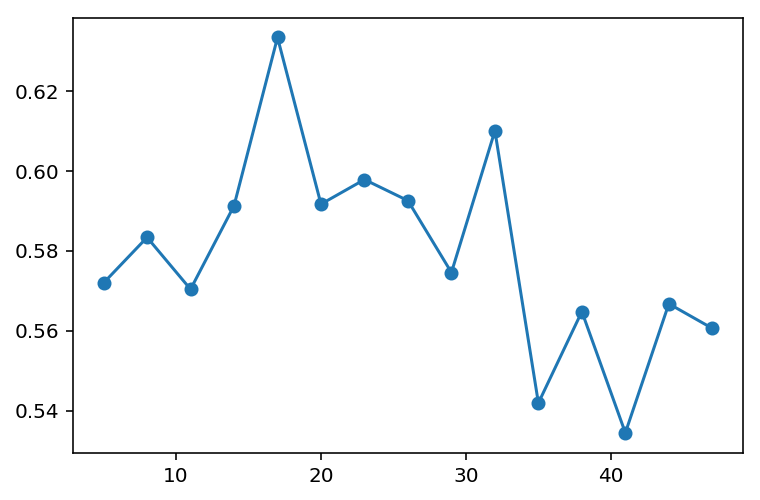

In [437]:
plt.plot(np.arange(5,50,3),coherence_vals,'o-')

In [435]:
pprint(list(zip(np.arange(5,50,3),coherence_vals)))

[(5, 0.5719504283008213),
 (8, 0.5833508344648827),
 (11, 0.5703565376682592),
 (14, 0.5912649853455437),
 (17, 0.6333916219559158),
 (20, 0.5916693904009767),
 (23, 0.5978262837650735),
 (26, 0.5925388551130693),
 (29, 0.5745529004824826),
 (32, 0.6100333883928474),
 (35, 0.5418802177587957),
 (38, 0.564777143423274),
 (41, 0.534417157871983),
 (44, 0.5667317281700952),
 (47, 0.5605706912411763)]


In [356]:
coherence_vals

[0.43461655266668864]

In [436]:
## Visualize the topics
visualize_topic25 = pyLDAvis.gensim.prepare(models[4], corpus, id2word,sort_topics=False)
visualize_topic25

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.170124 -0.076719       1        1   1.890562
1      0.135426  0.102025       2        1   7.557002
2      0.068765  0.001672       3        1   4.843736
3      0.245127 -0.137711       4        1   6.993116
4      0.131557 -0.114639       5        1   2.712374
5      0.178797 -0.059710       6        1   4.658713
6      0.076353  0.169184       7        1   4.525507
7     -0.182622  0.029151       8        1   8.094888
8     -0.113322 -0.082717       9        1   7.671343
9     -0.123352 -0.037223      10        1  12.321740
10    -0.092778  0.205792      11        1   5.121586
11    -0.117272  0.025278      12        1   6.862029
12    -0.065666  0.181996      13        1   7.760818
13    -0.191100 -0.150077      14        1   3.079224
14     0.030772 -0.031996      15        1   4.816199
15     0.172896  0.113125      16        1   3.065878
16     0.016546 -0.137429      17        1   8.025284, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
208   Default  2647.000000         file  2647.000000  30.0000  30.0000
133   Default  1471.000000          key  1471.000000  29.0000  29.0000
158   Default  6968.000000          use  6968.000000  28.0000  28.0000
2073  Default  1346.000000         game  1346.000000  27.0000  27.0000
1223  Default  1822.000000          god  1822.000000  26.0000  26.0000
126   Default  1605.000000        drive  1605.000000  25.0000  25.0000
175   Default  1676.000000         post  1676.000000  24.0000  24.0000
200   Default  1029.000000         card  1029.000000  23.0000  23.0000
1173  Default  1108.000000       window  1108.000000  22.0000  22.0000
278   Default  1077.000000          car  1077.000000  21.0000  21.0000
1437  Default  1017.000000         team  1017.000000  20.0000  20.0000
221   Default  2117.000000      program  2117.000000  19.0000  19.0000
543   Default  1259.000000        email  1259.000000  18.0000  18.0000
300   Default  1364.000000        thank  1364.000000  17.0000  17.0000
869   Default   976.000000         play   976.000000  16.0000  16.0000
1567  Default   911.000000          gun   911.000000  15.0000  15.0000
984   Default  1366.000000         send  1366.000000  14.0000  14.0000
383   Default  1484.000000          bit  1484.000000  13.0000  13.0000
161   Default  2804.000000         year  2804.000000  12.0000  12.0000
1633  Default   539.000000       church   539.000000  11.0000  11.0000
135   Default  1238.000000         line  1238.000000  10.0000  10.0000
1808  Default   611.000000         scsi   611.000000   9.0000   9.0000
72    Default  4109.000000       people  4109.000000   8.0000   8.0000
166   Default  4236.000000         good  4236.000000   7.0000   7.0000
1073  Default  2343.000000       system  2343.000000   6.0000   6.0000
95    Default  4565.000000         know  4565.000000   5.0000   5.0000
550   Default   917.000000        entry   917.000000   4.0000   4.0000
42    Default  3910.000000        think  3910.000000   3.0000   3.0000
1243  Default   882.000000         chip   882.000000   2.0000   2.0000
653   Default   871.000000        image   871.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
108   Topic17   172.152649    treatment   197.377274   2.3858  -5.8649
2792  Topic17    89.524574   laboratory    94.303314   2.4706  -6.5187
1129  Topic17   450.444000   university   606.023438   2.2259  -4.9030
3292  Topic17    83.459793      illness    87.209976   2.4786  -6.5889
87    Topic17   370.751282       center   536.628235   2.1528  -5.0977
2653  Topic17   381.276245        study   556.252136   2.1449  -5.0697
2742  Topic17   144.888321    institute   172.044159   2.3508  -6.0373
2927  Topic17   138.573257       rocket   169.370300   2.3219  -6.0819
975   Topic17   181.

In [438]:
pprint(models[4].top_topics(corpus_vect_gensim, topn=20))

[([(0.013534161, 'think'),
   (0.012987103, 'year'),
   (0.01180589, 'president'),
   (0.010901758, 'people'),
   (0.00952579, 'work'),
   (0.008711188, 'job'),
   (0.008106431, 'money'),
   (0.007918581, 'know'),
   (0.0066519068, 'want'),
   (0.0065289843, 'pay'),
   (0.0062058037, 'tax'),
   (0.0055616205, 'government'),
   (0.005392589, 'new'),
   (0.0053045014, 'good'),
   (0.0051660826, 'support'),
   (0.005079671, 'believe'),
   (0.004975128, 'american'),
   (0.0047725704, 'look'),
   (0.0047690133, 'need'),
   (0.0047176043, 'like')],
  -8.887121718179719),
 ([(0.024689453, 'use'),
   (0.014646042, 'problem'),
   (0.012331836, 'work'),
   (0.011259001, 'drive'),
   (0.009946019, 'disk'),
   (0.008807537, 'system'),
   (0.0086541325, 'dos'),
   (0.008248236, 'like'),
   (0.00780326, 'need'),
   (0.0075501646, 'windows'),
   (0.007235415, 'know'),
   (0.006587885, 'run'),
   (0.006276064, 'mac'),
   (0.006203305, 'try'),
   (0.005953104, 'new'),
   (0.0059223413, 'computer'),
   